# Carga de capas geograficas para calcular las estadisticas de los servicios de transportes, seguridad, salud, ensañanza y comercio, por barrio 

 ******** 1. Carga de librerias geoespaciales ********

In [1]:
import fiona; help(fiona.open)
import pandas as pd; 
import geopandas as gpd
import matplotlib.pyplot as plt
import gdal
import shapely

Help on function open in module fiona:

open(fp, mode='r', driver=None, schema=None, crs=None, encoding=None, layer=None, vfs=None, enabled_drivers=None, crs_wkt=None, **kwargs)
    Open a collection for read, append, or write
    
    In write mode, a driver name such as "ESRI Shapefile" or "GPX" (see
    OGR docs or ``ogr2ogr --help`` on the command line) and a schema
    mapping such as:
    
      {'geometry': 'Point',
       'properties': [('class', 'int'), ('label', 'str'),
                      ('value', 'float')]}
    
    must be provided. If a particular ordering of properties ("fields"
    in GIS parlance) in the written file is desired, a list of (key,
    value) pairs as above or an ordered dict is required. If no ordering
    is needed, a standard dict will suffice.
    
    A coordinate reference system for collections in write mode can be
    defined by the ``crs`` parameter. It takes Proj4 style mappings like
    
      {'proj': 'longlat', 'ellps': 'WGS84', 'datum': 'W

******** 2. Carga de ficheros en formato shape muestra sus datos y convierte al mismo sistema de proyección de coordenadas (epsg:25830 (ETRS89 UTM 30) aquellos que no lo estan ********  

Inmuebles
(14782, 16)
    F1       id  sq_mt_buil  n_rooms  n_bathroom  floor  buy_price  \
0  0.0  21742.0        64.0      2.0         1.0    3.0    85000.0   
1  1.0  21741.0        70.0      3.0         1.0    4.0   129900.0   
2  2.0  21740.0        94.0      2.0         2.0    1.0   144247.0   
3  3.0  21739.0        64.0      2.0         1.0    0.0   109900.0   
4  4.0  21738.0       108.0      2.0         2.0    4.0   260000.0   

   buy_price_  is_renewal  is_new_dev  has_lift  is_exterio  has_parkin  \
0      1328.0         0.0         0.0       0.0         1.0         0.0   
1      1856.0         1.0         0.0       1.0         1.0         0.0   
2      1535.0         0.0         0.0       1.0         1.0         0.0   
3      1717.0         0.0         0.0       1.0         1.0         0.0   
4      2407.0         0.0         0.0       1.0         1.0         1.0   

         lat      long                   geometry  
0  40.342876 -3.688974  POINT (-3.68897 40.34288)  
1 

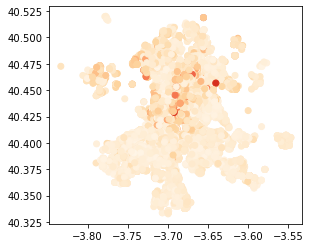

Nuevo CRS:  epsg:4326
Barrios
(131, 10)
   OBJECTID  geodb_oid CODDIS      NOMDIS CODBAR CODDISTRIT CODBARRIO  \
0       108        108     17  Villaverde    172         17      17-2   
1       109        109     17  Villaverde    173         17      17-3   
2       111        111     17  Villaverde    175         17      17-5   
3       110        110     17  Villaverde    174         17      17-4   
4       107        107     17  Villaverde    171         17      17-1   

                                           NOMBRE  ORIG_FID  \
0                                   San Cristobal       107   
1                                        Butarque       108   
2                                     Los Angeles       110   
3                                     Los Rosales       109   
4  Villaverde Alto, Casco Histórico de Villaverde       106   

                                            geometry  
0  POLYGON ((441930.867 4466853.189, 441929.463 4...  
1  POLYGON ((444144.857 4464473.

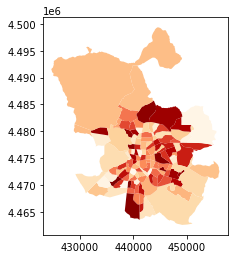

Nuevo CRS:  EPSG:4326
Estación de metro
(740, 10)
            ESTACION    LINEAS                  SALIDA  \
0  Plaza de Castilla  1, 10, 9              Castellana   
1  Plaza de Castilla  1, 10, 9    P, Castellana, pares   
2  Plaza de Castilla  1, 10, 9  P, Castellana, impares   
3      Valdeacederas         1  Capitan Blanco Argibay   
4      Valdeacederas         1                  Anlbal   

                                           DIRECCION COD_MUNI  \
0                                         Frente dep      079   
1  Paseo Castellana (centro) 189/216 (intercambia...      079   
2                              Paseo Castellana, 189      079   
3                           Calle Bravo Murillo, 324      079   
4                           Calle Bravo Murillo, 350      079   

                   HORARIO     UTM_X      UTM_Y CODIGO2  \
0                     None  441709.0  4479859.0       1   
1                     None  441683.0  4480009.0       2   
2                     None  44165

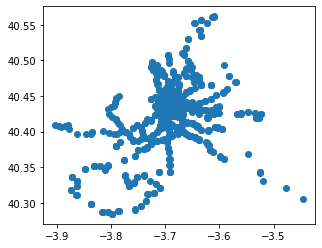

Nuevo CRS:  epsg:4326
Autobuses
(14036, 72)
   OBJECTID IDESTACION FECHAACTUA  MODO CODIGOESTA               DENOMINACI  \
0         1    8_12867   20190912     8      12867      FUENTESAUCO-FONSECA   
1         2    8_12868   20190912     8      12868      FUENTESAUCO-FONSECA   
2         3    8_12869   20190912     8      12869  FUENTEVAQUEROS-HONTANAR   
3         4    8_12872   20190912     8      12872               NORIA-ERAS   
4         5    8_12873   20190912     8      12873            NORIA-HUMANES   

  OBSERVACIO SITUACION CODIGOCTME CODIGOEMPR  ... HasLabel  LabelID  \
0       None         S       None       None  ...        0        0   
1       None         S       None       None  ...        0        0   
2       None         S       None       None  ...        0        0   
3       None         S       None       None  ...        0        0   
4       None         S       None       None  ...        0        0   

  FID_Alcobe Codigo Texto Cod_Prov Provincia Cod_CCAA 

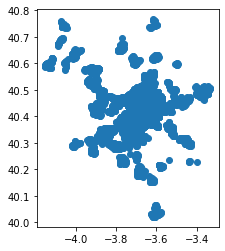

Nuevo CRS:  epsg:4326
Bomberos
(35, 9)
                                  ETIQUETA  \
0  Parque de Bomberos de Alcalá de Henares   
1          Parque de Bomberos de Las Rozas   
2         Parque de Bomberos de Alcobendas   
3   Parque de Bomberos de Aldea del Fresno   
4           Parque de Bomberos de Aranjuez   

                                   DIRECCION CMUN          MUNICIPIO   UTM_X  \
0  Calle Ruperto Chapí,  c/v Federico Chueca  005  Alcalá de Henares  467443   
1                    Carretera N-VI, km 22,5  127          Las Rozas  425079   
2                 Carretera de Barajas, km 1  006         Alcobendas  447445   
3                    Carretera M-507, km. 16  008   Aldea del Fresno  398856   
4                     Paseo del Deleite, s/n  013           Aranjuez  447778   

     UTM_Y CODIGO2 TIPO                        geometry  
0  4482053       1   CA  POINT (467443.000 4482053.000)  
1  4485928       2   CA  POINT (425079.000 4485928.000)  
2  4487326       3   CA  POIN

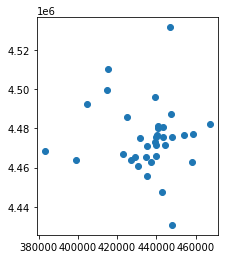

Nuevo CRS:  EPSG:4326
Policia local
(138, 7)
  CMUN               LMUN                     DIRECCION  \
0  002            Ajalvir         Calle Escalerillas, 7   
1  004         Álamo (El)  Callejón Bienvenido López, 1   
2  005  Alcalá de Henares              Avda. de Meco, 1   
3  006         Alcobendas          Avenida Bruselas, 43   
4  006         Alcobendas     Avenida Valdelaparra, 124   

                                            ETIQUETA   UTM_X    UTM_Y  \
0                              Policía Local Ajalvir  459337  4487340   
1                             Policía Local El Álamo  415733  4453736   
2                    Policía Local Alcalá de Henares  469707  4482613   
3   Policia Local Alcobendas Distrito Urbanizaciones  445548  4486541   
4  Policia Local Alcobendas Distrito Norte (Sede ...  443939  4488759   

                         geometry  
0  POINT (459337.000 4487340.000)  
1  POINT (415733.000 4453736.000)  
2  POINT (469707.000 4482613.000)  
3  POINT (445548.

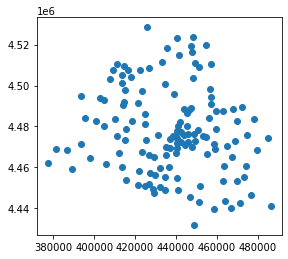

Nuevo CRS:  EPSG:4326
Policia nacional
(52, 7)
  CMUN                                             NOMBRE  \
0  005  Alcalá de Henares. Comisaría tramitación de DN...   
1  006  Alcobendas. Comisaría tramitación de DNI y pas...   
2  007  Alcorcón. Comisaría tramitación de DNI y pasap...   
3  013  Aranjuez. Comisaría tramitación de DNI y pasap...   
4  014    Arganda del Rey. Tramitación de DNI y pasaporte   

                                           CATEGORIA  \
0  Comisaría tramitación de DNI y pasaporte, Ofic...   
1  Comisaría tramitación de DNI y pasaporte, Ofic...   
2  Comisaría tramitación de DNI y pasaporte, Ofic...   
3  Comisaría tramitación de DNI y pasaporte, Ofic...   
4                     Tramitación de DNI y pasaporte   

                                           DIRECCION   UTM_X    UTM_Y  \
0                               Avenida de Meco, s/n  469719  4482595   
1                              Avenida de España, 52  446181  4488684   
2                            C

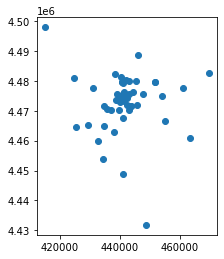

Nuevo CRS:  EPSG:4326
Centros de salud
(266, 10)
   OID_                           TIPOCEN2 TIPOVIAL           NOMVIA NUMERO  \
0     2     Centro de Salud Carmen Calzado    Calle   Carmen Calzado     14   
1     8    Centro de Salud Juan de Austria  Avenida  Juan de Austria     19   
2     9          Centro de Salud La Garena    Calle     Arturo Soria     10   
3     6  Centro de Salud Luis Vives I y II    Calle       Luis Vives     16   
4     5      Centro de Salud Manuel Merino    Calle    Manuel Merino      1   

           MUNICIPIO CODMUN   UTM_X    UTM_Y                        geometry  
0  Alcalá de Henares    005  468979  4481282  POINT (468979.000 4481282.000)  
1  Alcalá de Henares    005  470297  4481952  POINT (470297.000 4481952.000)  
2  Alcalá de Henares    005  466688  4481291  POINT (466688.000 4481291.000)  
3  Alcalá de Henares    005  468796  4480551  POINT (468796.000 4480551.000)  
4  Alcalá de Henares    005  469712  4481336  POINT (469712.000 4481336.000)  
CR

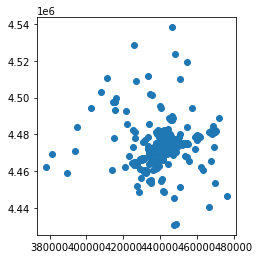

Nuevo CRS:  EPSG:4326
Hospitales
(86, 10)
  CENTRO_COD      CH                                              BUSCA CMUN  \
0        429  280724  Hospital Central de la Defensa Gómez Ulla. Glo...  079   
1        319  CH0001  Fremap Hospital y Centro de Rehabilitación de ...  080   
2        532  CH0004  Centro San Juan de Dios. Avenida de San Juan d...  040   
3        148  CH0006  Fuensanta S.l. (Clínica Fuensanta). Calle de A...  079   
4        398  CH0008  Clínica La Luz, S.l.. Calle del General Rodrig...  079   

    UTM_X    UTM_Y                                           ETIQUETA  \
0  436745  4471110          Hospital Central de la Defensa Gómez Ulla   
1  427799  4478345  Fremap Hospital y Centro de Rehabilitación de ...   
2  447682  4445737                            Centro San Juan de Dios   
3  445713  4476806                 Fuensanta S.l. (Clínica Fuensanta)   
4  439451  4477308                               Clínica La Luz, S.l.   

                        DIRECCION SUCA

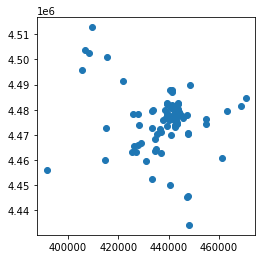

Nuevo CRS:  EPSG:4326
Farmacias
(2880, 7)
   COD                                              BUSCA MUNICIPIO  \
0    0  Farmacia Plaza del Dos de Mayo 6, Madrid. Ofic...    Madrid   
1    1  Farmacia Calle Ríos Rosas 50, Madrid. Oficina ...    Madrid   
2    2  Farmacia Calle de Argensola 12, Madrid. Oficin...    Madrid   
3    3  Farmacia Calle de Alcalá 98, Madrid. Oficina 0005    Madrid   
4    4  Farmacia Plaza de Salesas 7, Madrid. Oficina 0006    Madrid   

  SUCA_CMUN4   UTM_X    UTM_Y                        geometry  
0       0796  440267  4475424  POINT (440267.000 4475424.000)  
1       0796  440953  4477006  POINT (440953.000 4477006.000)  
2       0796  441063  4475191  POINT (441063.000 4475191.000)  
3       0796  442754  4475146  POINT (442754.000 4475146.000)  
4       0796  441090  4475019  POINT (441090.000 4475019.000)  
CRS:  epsg:25830


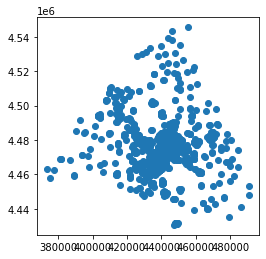

Nuevo CRS:  EPSG:4326
Centros de enseñanza
(165, 32)
          PK                                             NOMBRE DESCRIPCIO  \
0     6845.0                            AFI Escuela de Finanzas       None   
1     6651.0                       Alliance Française de Madrid       None   
2    41816.0                             British Council Madrid       None   
3  4939265.0  Centro autorizado profesional de música Tempo ...       None   
4     6714.0                Centro Cultural y Deportivo Tajamar       None   

  HORARIO                             EQUIPAMIEN  \
0    None  Másteres y cursos de especialización.   
1    None          Cursos y talleres de francés.   
2    None                   Enseñanza de inglés.   
3    None                                   None   
4    None                                   None   

                                          TRANSPORTE  \
0  Metro: Rubén Darío (línea 5), Núñez Balboa (lí...   
1  Metro: Santo Domingo (línea 2), Opera (líneas ... 

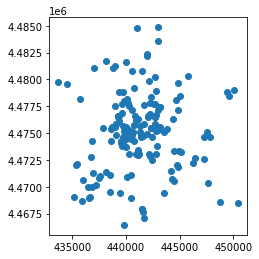

Nuevo CRS:  EPSG:4326
Colegios públicos
(248, 32)
          PK                                     NOMBRE DESCRIPCIO HORARIO  \
0   176850.0              Colegio Público Adolfo Suárez       None    None   
1     5075.0              Colegio Público Agustina Díez       None    None   
2  4693138.0  Colegio Público Agustín Rodriguez Sahagún       None    None   
3     5076.0            Colegio Público Alberto Alcocer       None    None   
4     5077.0        Colegio Público Alcalde de Móstoles       None    None   

                                          EQUIPAMIEN  \
0     Comedor - Horario ampliado - Planes de mejora.   
1                         Comedor - Horario ampliado   
2      Horario ampliado - Comedor - Planes de mejora   
3  Comedor - Transporte - Horario ampliado - Plan...   
4  Transporte - Comedor - Horario ampliado - Plan...   

                                        TRANSPORTE  \
0                                         BUS: 174   
1  METRO: Alto del Arenal BUS: 54 , 

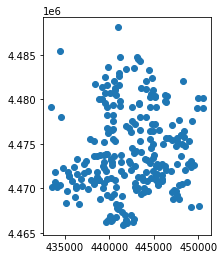

Nuevo CRS:  EPSG:4326
Supermercados y pequeño_comercio
(33300, 10)
                     Nombre      lat      lon                            cp  \
0       Viajes Eroski AMARA  43.3035 -1.97597  20011 Donostia-San Sebastian   
1                 Spar SPAR  43.2319 -2.85011                          None   
2  Eroski Center Trapagaran  43.3034 -3.03819              48510 Trapagaran   
3    Viajes Eroski Galdakao  43.2312 -2.84279                48960 Galdakao   
4    Viajes Eroski El Valle  43.3034 -3.03649              48510 Trapagaran   

             telefono                  direccion     poi_type  ID_SHOP SOURCE  \
0  Tel. 94 34 54 69 0            Avda Madrid, 24  supermarket      601    web   
1                None  CALLE URRETA, 18 GALDAKAO  supermarket      801    web   
2  Tel. 94 49 23 40 0          Jose Rufino Olaso  supermarket      602    web   
3  Tel. 94 45 70 11 7                 Zamakoa, 5  supermarket      802    web   
4  Tel. 94 48 62 57 2           Doctor Mulero, 4  sup

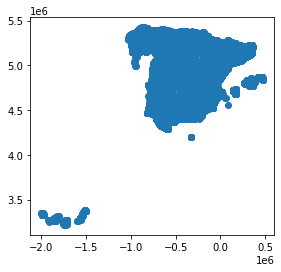

Nuevo CRS:  EPSG:4326


In [3]:
# Inmuebles Kaggle (Idealista)
inmuebles_df = gpd.read_file('D:\\3. DATOS SOLO PORTATIL\\F1. Anaconda_Jupyter Notebook\\Indicadores Nivel Servicios Barrios Madrid\\Datos\\Inmuebles\\Inmuebles_Shp.shp')
print('Inmuebles')
print(inmuebles_df.shape)
print(inmuebles_df.head())
print('CRS: ',inmuebles_df.crs) # no funciona para ver la proyección inmuebles_df.crs investigar) 
inmuebles_df.plot(column='sq_mt_buil', cmap='OrRd')
plt.show()
#prj = pyproj.CRS("EPSG:4326")
#print(prj)
inmuebles_df = inmuebles_df.to_crs("EPSG:4326") # Cambia proyección a ETRS89- inmueblesok.to_crs(epsg=25830 tambien funciona para cambiar el sistema de proyección
print('Nuevo CRS: ',inmuebles_df.crs)

# Barrios de madrid
barrios_df = gpd.read_file('D:\\3. DATOS SOLO PORTATIL\\F1. Anaconda_Jupyter Notebook\\Indicadores Nivel Servicios Barrios Madrid\\Datos\\Barrios Madrid_1694\\Barrios madrid SHP_ETRS89AytoMadrid\\BARRIOS.shp')
print('Barrios')
print(barrios_df.shape)
print(barrios_df.head())
print('CRS: ',barrios_df.crs)
barrios_df.plot(column='NOMBRE', cmap='OrRd')
plt.show()
barrios_df = barrios_df.to_crs("EPSG:4326") # Cambia proyección a WGS84 .to_crs(epsg=25830) tambien funciona para cambiar el sistema de proyección
print('Nuevo CRS: ',barrios_df.crs)

barrios_df.to_csv("barriosWGS84.csv") # sE convierte a csv para uso en la busqueda en la web del barrio al que pertenece el piso 

# Bocas de metro de madrid
bocametro_df = gpd.read_file('D:\\3. DATOS SOLO PORTATIL\\F1. Anaconda_Jupyter Notebook\\Indicadores Nivel Servicios Barrios Madrid\\Datos\\Bocas de Metro\\BocasMetro.shp')
print('Estación de metro')
print(bocametro_df.shape)
print(bocametro_df.head())
print('CRS: ',bocametro_df.crs)
bocametro_df.plot()
plt.show()
bocametro_df = bocametro_df.to_crs("EPSG:4326") # Cambia proyección a WGS84 
print('Nuevo CRS: ',bocametro_df.crs)

# Autobuses de madrid
autobuses_df = gpd.read_file('D:\\3. DATOS SOLO PORTATIL\\F1. Anaconda_Jupyter Notebook\\Indicadores Nivel Servicios Barrios Madrid\\Datos\\Bocas de Metro\\Autobuses_Urbanos_Interurbanos_Madrid.shp')
print('Autobuses')
print(autobuses_df.shape)
print(autobuses_df.head())
print('CRS: ',autobuses_df.crs)
autobuses_df.plot()
plt.show()
autobuses_df = autobuses_df.to_crs("EPSG:4326") # Cambia proyección a WGS84
print('Nuevo CRS: ',autobuses_df.crs)

# Bomberos de madrid
bomberos_df = gpd.read_file('D:\\3. DATOS SOLO PORTATIL\\F1. Anaconda_Jupyter Notebook\\Indicadores Nivel Servicios Barrios Madrid\\Datos\\Protección y seguridad_ Bomberos\\bomberos.shp')
print('Bomberos')
print(bomberos_df.shape)
print(bomberos_df.head())
print('CRS: ',bomberos_df.crs)
bomberos_df.plot()
plt.show()
bomberos_df = bomberos_df.to_crs("EPSG:4326") # Cambia proyección a WGS84
print('Nuevo CRS: ',bomberos_df.crs)

# Policia local de madrid
polLocal_df = gpd.read_file('D:\\3. DATOS SOLO PORTATIL\\F1. Anaconda_Jupyter Notebook\\Indicadores Nivel Servicios Barrios Madrid\\Datos\\Protección y seguridad_ Policía Local\\policialocal.shp')
print('Policia local')
print(polLocal_df.shape)
print(polLocal_df.head())
print('CRS: ',polLocal_df.crs)
polLocal_df.plot()
plt.show()
polLocal_df = polLocal_df.to_crs("EPSG:4326") # Cambia proyección a WGS84
print('Nuevo CRS: ',polLocal_df.crs)

# Policia nacional de madrid
polnacional_df = gpd.read_file('D:\\3. DATOS SOLO PORTATIL\\F1. Anaconda_Jupyter Notebook\\Indicadores Nivel Servicios Barrios Madrid\\Datos\\Protección y seguridad_ Policía Nacional\\policianacional.shp')
print('Policia nacional')
print(polnacional_df.shape)
print(polnacional_df.head())
print('CRS: ',polnacional_df.crs)
polnacional_df.plot()
plt.show()
polnacional_df = polnacional_df.to_crs("EPSG:4326") # Cambia proyección a WGS84
print('Nuevo CRS: ',polnacional_df.crs)

# Centros de salud de madrid
csalud_df = gpd.read_file('D:\\3. DATOS SOLO PORTATIL\\F1. Anaconda_Jupyter Notebook\\Indicadores Nivel Servicios Barrios Madrid\\Datos\\Salud_ Centros sanitarios. Centros de salud\\centrosalud.shp')
print('Centros de salud')
print(csalud_df.shape)
print(csalud_df.head())
print('CRS: ',csalud_df.crs)
csalud_df.plot()
plt.show()
csalud_df = csalud_df.to_crs("EPSG:4326") # Cambia proyección a WGS84
print('Nuevo CRS: ',csalud_df.crs)

# Hospitales de madrid
hospital_df = gpd.read_file('D:\\3. DATOS SOLO PORTATIL\\F1. Anaconda_Jupyter Notebook\\Indicadores Nivel Servicios Barrios Madrid\\Datos\\Salud_ Centros sanitarios. Hospitales\\hospital.shp')
print('Hospitales')
print(hospital_df.shape)
print(hospital_df.head())
print('CRS: ',hospital_df.crs)
hospital_df.plot()
plt.show()
hospital_df = hospital_df.to_crs("EPSG:4326") # Cambia proyección a WGS84
print('Nuevo CRS: ',hospital_df.crs)

# Farmacias de Madrid
farmacias_df = gpd.read_file('D:\\3. DATOS SOLO PORTATIL\\F1. Anaconda_Jupyter Notebook\\Indicadores Nivel Servicios Barrios Madrid\\Datos\\Salud_ Farmacias\\farmacias.shp')
print('Farmacias')
print(farmacias_df.shape)
print(farmacias_df.head())
print('CRS: ',farmacias_df.crs)
farmacias_df.plot()
plt.show()
farmacias_df = farmacias_df.to_crs("EPSG:4326") # Cambia proyección a WGS84
print('Nuevo CRS: ',farmacias_df.crs)

# Centros de enseñanza municipio madrid
censeñanza_df = gpd.read_file('D:\\3. DATOS SOLO PORTATIL\\F1. Anaconda_Jupyter Notebook\\Indicadores Nivel Servicios Barrios Madrid\\Datos\\Centros de enseñanza municipio madrid\\CentrosensenanzaXYTableToPoint.shp')
print('Centros de enseñanza')
print(censeñanza_df.shape)
print(censeñanza_df.head())
print('CRS: ',censeñanza_df.crs)
censeñanza_df.plot()
plt.show()
censeñanza_df = censeñanza_df.to_crs("EPSG:4326") # Cambia proyección a WGS84
print('Nuevo CRS: ',censeñanza_df.crs)

# Colegios públicos municipio madrid
colpublicos_df = gpd.read_file('D:\\3. DATOS SOLO PORTATIL\\F1. Anaconda_Jupyter Notebook\\Indicadores Nivel Servicios Barrios Madrid\\Datos\\Centros de enseñanza municipio madrid\\ColegiospublicosXYTableToPoint1.shp')
print('Colegios públicos')
print(colpublicos_df.shape)
print(colpublicos_df.head())
print('CRS: ',colpublicos_df.crs)
colpublicos_df.plot()
plt.show()
colpublicos_df = colpublicos_df.to_crs("EPSG:4326") # Cambia proyección a WGS84
print('Nuevo CRS: ',colpublicos_df.crs)

# Supermercados y pequeño_comercio_de España
SuperyComercios_df = gpd.read_file('D:\\3. DATOS SOLO PORTATIL\\F1. Anaconda_Jupyter Notebook\\Indicadores Nivel Servicios Barrios Madrid\\Datos\\Supermercadosy Pequeño Comercio_Geofabrik\\Supermercados_y_pequeño_comercio_de_España.shp')
print('Supermercados y pequeño_comercio')
print(SuperyComercios_df.shape)
print(SuperyComercios_df.head())
print('CRS: ',SuperyComercios_df.crs)
SuperyComercios_df.plot()
plt.show()
SuperyComercios_df = SuperyComercios_df.to_crs("EPSG:4326") # Cambia proyección a WGS84
print('Nuevo CRS: ',SuperyComercios_df.crs)

# Dibuja un mapa con todas las capas




 **** 3.Dibuja un mapa con todas las capas con Geopandas ****

<AxesSubplot:>

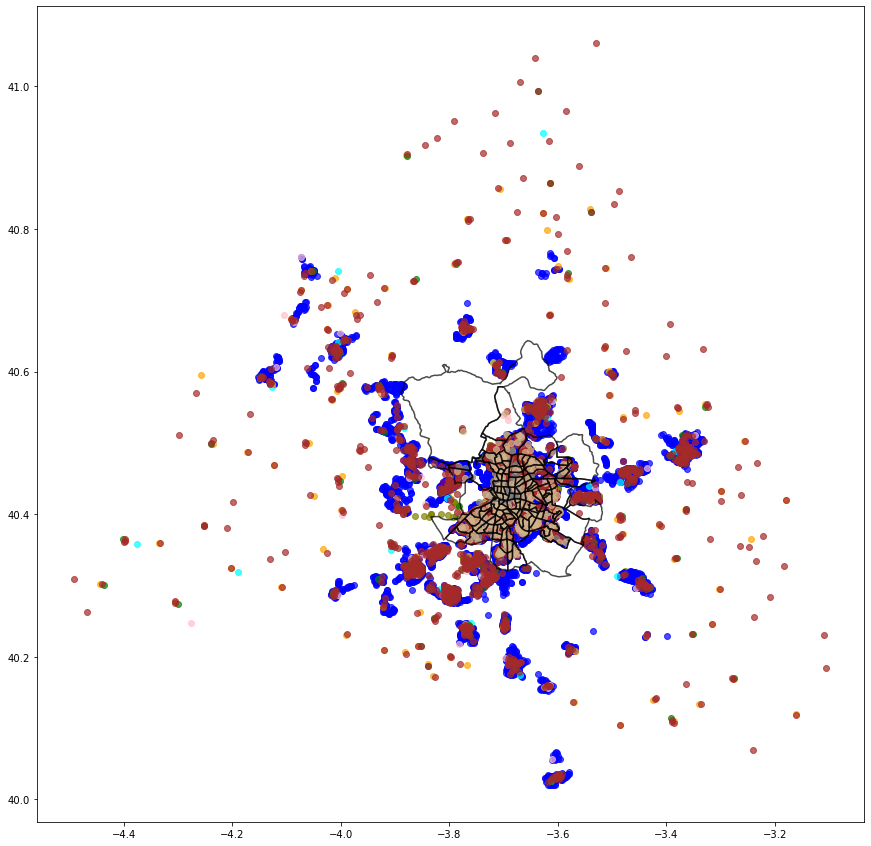

In [4]:
fig, ax = plt.subplots (figsize = (15,15))
#SuperyComercios_df.plot(ax = ax, alpha = 0.7, color = "red")
barrios_df.boundary.plot(ax = ax, alpha = 0.7, color = "black")
bocametro_df.plot(ax = ax, alpha = 0.7, color = "olive")
autobuses_df.plot(ax = ax, alpha = 0.7, color = "blue")
bomberos_df.plot(ax = ax, alpha = 0.7, color = "cyan")
polLocal_df.plot(ax = ax, alpha = 0.7, color = "orange")
polnacional_df.plot(ax = ax, alpha = 0.7, color = "purple")
csalud_df.plot(ax = ax, alpha = 0.7, color = "green")
hospital_df.plot(ax = ax, alpha = 0.7, color = "pink")
farmacias_df.plot(ax = ax, alpha = 0.7, color = "brown")
censeñanza_df.plot(ax = ax, alpha = 0.7, color = "gray")
colpublicos_df.plot(ax = ax, alpha = 0.7, color = "tan")

******** 4. Calcula las estadisticas de cada uno de los servicios por Barrio Realizado en QGIS ********

******** 5. Calcula el barrio al que pertenece cada inmueble en la capa de inmuebles ********

    F1       id  sq_mt_buil  n_rooms  n_bathroom  floor  buy_price  \
0  0.0  21742.0        64.0      2.0         1.0    3.0    85000.0   
1  1.0  21741.0        70.0      3.0         1.0    4.0   129900.0   
2  2.0  21740.0        94.0      2.0         2.0    1.0   144247.0   
3  3.0  21739.0        64.0      2.0         1.0    0.0   109900.0   
4  4.0  21738.0       108.0      2.0         2.0    4.0   260000.0   

   buy_price_  is_renewal  is_new_dev  has_lift  is_exterio  has_parkin  \
0      1328.0         0.0         0.0       0.0         1.0         0.0   
1      1856.0         1.0         0.0       1.0         1.0         0.0   
2      1535.0         0.0         0.0       1.0         1.0         0.0   
3      1717.0         0.0         0.0       1.0         1.0         0.0   
4      2407.0         0.0         0.0       1.0         1.0         1.0   

         lat      long                   geometry  
0  40.342876 -3.688974  POINT (-3.68897 40.34288)  
1  40.357024 -3.697098  

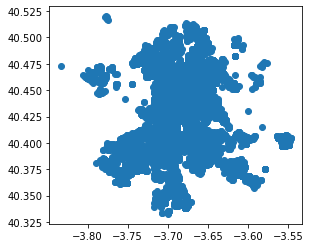

In [6]:
# Execute spatial join Barrio e inmuebles (es una función de geopandas) ver https://geopandas.org/mergingdata.html
print(inmuebles_df.head())
print('Inmuebles antes del sjoin',inmuebles_df.shape) 
print(barrios_df.head())
print('Barrios antes del sjoin',barrios_df.shape)
InmueblesFinal = gpd.sjoin(inmuebles_df, barrios_df,how="inner", op='within') # SPATIAL JOIN
print('Barrios tras el sjoin',barrios_df.shape)
print('Inmuebles tras el sjoin',InmueblesFinal.shape)
print(InmueblesFinal.head())
print(InmueblesFinal)
InmueblesFinal.plot()
plt.show()